# MNIST project digit recognition:

learning classification from scratch, learning ressources: Youtube, O´Reilly, http://neuralnetworksanddeeplearning.com/chap1.html

In [24]:
from sklearn.datasets import fetch_openml
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])

In [25]:
X, y = mnist["data"], mnist["target"]
#X.shape ##(70000, 784) = 70k images, each 784 features with 28x28 pixels. 
         ##feature is pixel intensity from 0 (white) to 255 (black)
#y.shape ## (70000,)

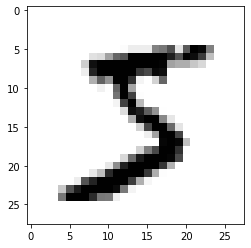

The label says it is following number: 5
Label has following datatype: <class 'numpy.ndarray'>


In [34]:
some_digit = X[0] #change number for different picture
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap="binary")
plt.axis("on")
plt.show()
print('The label says it is following number:', y[0])
print('Label has following datatype:', type(y))

In [30]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

# Training a binary classifier
Building a detector for number 5 - example binary classifier (5 and not 5). Use "some_digit" shown above. True for 5.

In [37]:
y_train_5 = (y_train == 5) # True for all 5s, False for all other digits
y_test_5 = (y_test == 5)

#use Stochastic Gradient Descent classifier (SGD)
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

sgd_clf.predict([some_digit])

array([ True])

# Performance Measures

### _Variante 1: Cross Validation_

In [38]:
# cross-validation is a good way to validate in general. Scikit offerst cross_val_score() function
# evaluate SGD Classifier using K-fold-cross-validation with three folds
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

#not the best way to validate classifier! (already 90% acc when everything is `not 5`!)

array([0.95035, 0.96035, 0.9604 ])

### _Variante 2: Confusion Matrix_

To compute the confusion matrix, you first need to have a set of predictions so that
they can be compared to the actual targets. cross_val_predict() performs K-fold
cross-validation, but instead of returning the evaluation scores, it returns the predictions
made on each test fold. This means that you get a clean prediction for each
instance in the training set. Split into: TP, FP, FN, TN (True/False Positive/Negative)

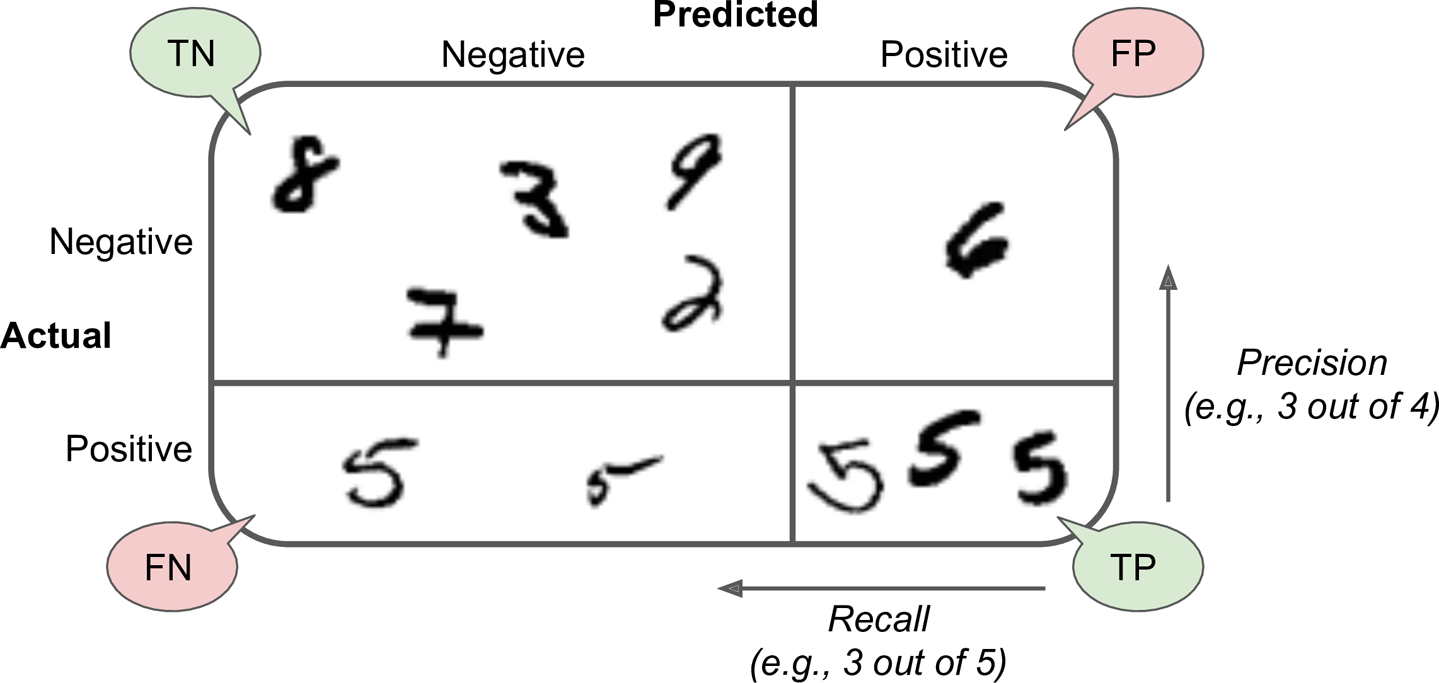

Accuracy of the positive predictions: $precision = \frac{TP}{TP+FP},\\ recall = \frac{TP}{TP+FN}$

In [43]:
#use cross_val_predict for prediction
#pass it the target classes (y_train_5) and the predicted classes(y_train_pred)
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

In [44]:
#perfect classifier with no False True/Positives!
y_train_perfect_predictions = y_train_5 # pretend we reached perfection
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]], dtype=int64)

### Preision and Recall
Scikit-Learn provides several functions to compute classifier metrics, including precisionand recall:

In [48]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5, y_train_pred) # == 4096 / (4096 + 1522)

0.6511713705958311